In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
tab = pd.read_csv("data/caption_proba.csv")

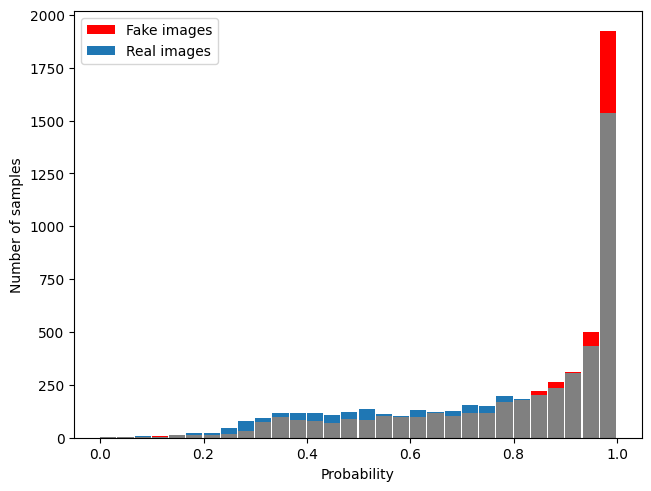

In [3]:
l_fake = list(tab["Fake-BLIP"])[1:]
l_real = list(tab["Real-BLIP"])[1:]

BINS = 30

fake_hist, _ = np.histogram(l_fake, bins=BINS)
real_hist, _ = np.histogram(l_real, bins=BINS)

min_hist = np.minimum(fake_hist, real_hist)

diff_hist = fake_hist - real_hist

X = np.arange(0,1, 1 / BINS)
fig, ax = plt.subplots(layout='constrained')
ax.bar(X, min_hist, align="edge", width=1/(BINS + 2), color="gray")
ax.bar(X, diff_hist.clip(min=0), width=1/(BINS + 2), bottom=min_hist, color="red", align="edge", label="Fake images")
ax.bar(X, (-diff_hist).clip(min=0), width=1/(BINS + 2), bottom=min_hist, align="edge", label="Real images")
ax.legend()
ax.set_xlabel("Probability")
ax.set_ylabel("Number of samples")
plt.show()
